## Chapter 15 Stationarity in Time Series Data

#### Stationary Time Series

Time series are stationary if they do not have trend or seasonal eﬀects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

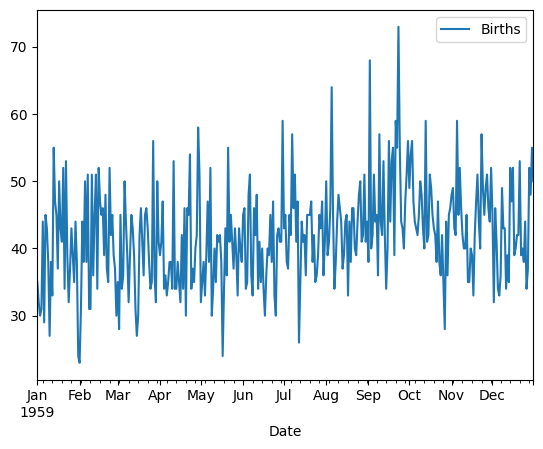

In [4]:
# stationary time series example
# load time series data
series = pd.read_csv('data/daily-total-female-births.csv', index_col=0, parse_dates=True)
series.plot()
plt.show()

In [5]:
series.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


#### Non-Stationary Time Series

Observations from a non-stationary time series show seasonal eﬀects, trends, and other structures that depend on the time index. Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

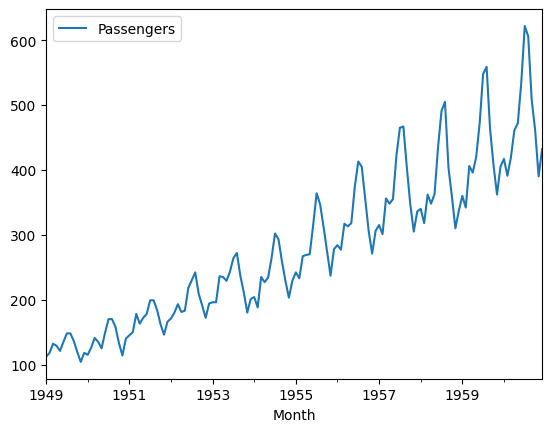

In [6]:
# non-stationary time series example
series = pd.read_csv('data/airline-passengers.csv', index_col=0, parse_dates=True)
series.plot()
plt.show()

#### Types of Stationary Time Series

- Stationary Process: A process that generates a stationary series of observations.
- Stationary Model: A model that describes a stationary series of observations.
- Trend Stationary: A time series that does not exhibit a trend.
- Seasonal Stationary: A time series that does not exhibit seasonality.
- Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.


#### Stationary Time Series and Forecasting

Should you make your time series stationary? Generally, yes. If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

The suggestion here is to treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.


#### Checks for Stationarity

There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.
- Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
- Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant diﬀerences.
- Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

#### Summary Statistics

A quick and dirty check to see if your time series is non-stationary is to review summary statistics. You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they diﬀer and the diﬀerence is statistically significant, the time series is likely non-stationary.

**Because we are looking at the mean and variance, we are assuming that the data conforms to a Gaussian (also called the bell curve or normal) distribution**. We can also quickly check this by eyeballing a histogram of our observations.

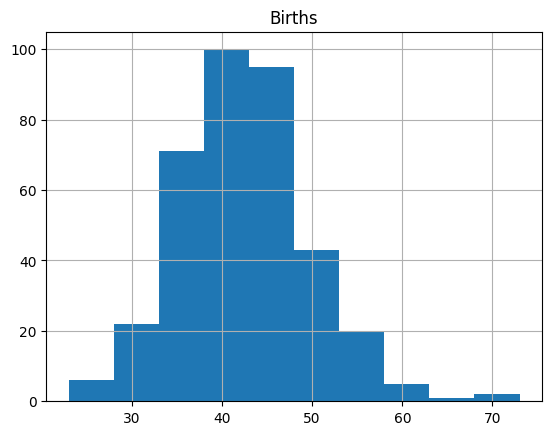

In [7]:
# plot a histogram of a time series
series = pd.read_csv('data/daily-total-female-births.csv', index_col=0, parse_dates=True)
series.hist()
plt.show()

We clearly see the bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail.

Next, we can split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values.

In [11]:
# calculate statistics of partitioned time series data - Daily Births Dataset
series =  pd.read_csv('data/daily-total-female-births.csv', index_col=0, parse_dates=True)
X = series['Births'].values
split = int(len(X) / 2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'var1={var1}, var2={var2}')

mean1=39.76373626373626, mean2=44.185792349726775
var1=49.21341021615746, var2=48.708650601690096


Running this example shows that the mean and variance values are diﬀerent, but in the same ball-park.

Next, let’s try the same trick on the Airline Passengers dataset.

In [13]:
# calculate statistics of partitioned time series data - Airline Passengers Dataset
series =  pd.read_csv('data/airline-passengers.csv', index_col=0, parse_dates=True)
X = series['Passengers'].values
split = int(len(X) / 2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'var1={var1}, var2={var2}')

mean1=182.90277777777777, mean2=377.69444444444446
var1=2244.0877700617284, var2=7367.962191358024


Running the example, we can see the mean and variance look very diﬀerent. We have a non-stationary time series.

Let’s take one step back and check if assuming a Gaussian distribution makes
sense in this case by plotting the values of the time series as a histogram.

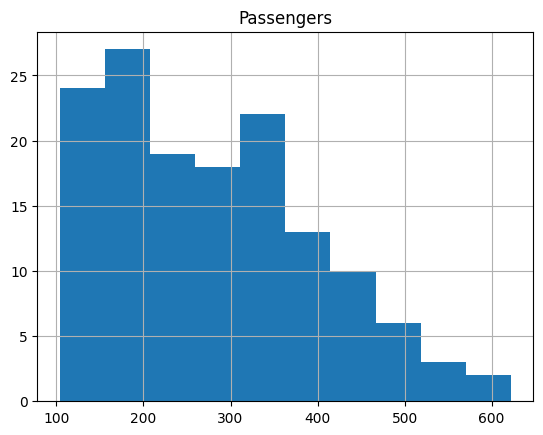

In [14]:
series.hist()
plt.show()

Running the example shows that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful. This squashed distribution of the observations may be another indicator of a non-stationary time series.

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing. This may suggest an *exponential growth from season to season*. **A log transform can be used to flatten out exponential change back to a linear relationship**. Below is the same histogram with a log transform of the time series.

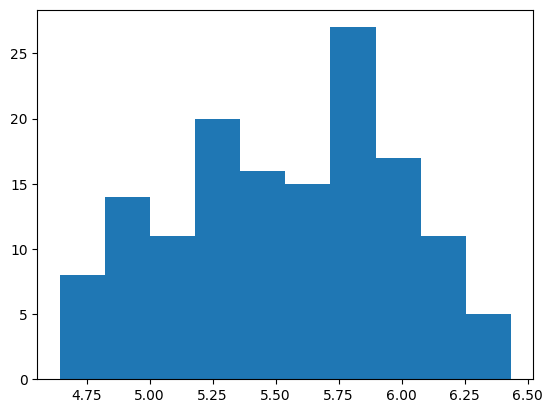

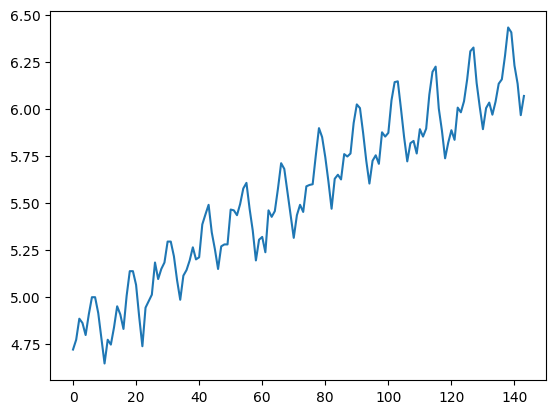

In [16]:
# histogram and line plot of log transformed time series
series = pd.read_csv('data/airline-passengers.csv', index_col=0, parse_dates=True)
X = series['Passengers'].values
X = np.log(X)
plt.hist(X)
plt.show()
plt.plot(X)
plt.show()

Running the example, we can see the more familiar Gaussian-like or Uniform-like distribution of values.

We can see in the line plot of the log transformed data that the exponential growth seems diminished, but we still have a trend and seasonal elements.

We can now calculate the mean and standard deviation of the values of the log transformed dataset.

In [18]:
split= int(len(X) / 2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'var1={var1}, var2={var2}')

mean1=5.17514614000377, mean2=5.909205777059973
var1=0.06837486074542806, var2=0.04926419375638024


Running the examples shows mean and standard deviation values for each group that are again similar, but not identical. Perhaps, from these numbers alone, we would say the time series is stationary, but we strongly believe this to not be the case from reviewing the line plot.

*This is a quick and dirty method that may be easily fooled*. We can use a statistical test to check if the diﬀerence between two samples of Gaussian random variables is real or a statistical fluke. We could explore statistical significance tests, like the Student’s t-test, but things get tricky because of the serial correlation between values.

#### Augmented Dickey-Fuller Test

The Augmented Dickey-Fuller test is a type of statistical test called a *unit root test*. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple diﬀerent lag values. **The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary** (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

We interpret this result using the p-value from the test. **A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary)**.

In [23]:
# calcualte stationarity test of time series data - Daily Female Births Dataset
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('data/daily-total-female-births.csv', index_col=0, parse_dates=True)
X = series['Births'].values
result = adfuller(X)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print(f'{key}: {value:.3f}')

ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
1%: -3.449
5%: -2.870
10%: -2.571


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

We can see that our statistic value of -4 is less than the value of -3.449 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1%.

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have
time-dependent structure.

In [25]:
# calcualte stationarity test of time series data - Airline Passenger Dataset
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('data/airline-passengers.csv', index_col=0, parse_dates=True)
X = series['Passengers'].values
result = adfuller(X)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print(f'{key}: {value:.3f}')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
1%: -3.482
5%: -2.884
10%: -2.579


The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary). Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null
hypothesis that the time series is non-stationary and does have time-dependent structure.

Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [27]:
# calcualte stationarity test of log transformed time series data - Airline Passenger Dataset
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('data/airline-passengers.csv', index_col=0, parse_dates=True)
X = series['Passengers'].values
X = np.log(X)
result = adfuller(X)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print(f'{key}: {value:.3f}')

ADF Statistic: -1.7170170891069683
p-value: 0.4223667747703874
Critical Values:
1%: -3.482
5%: -2.884
10%: -2.579


Running the example shows a negative value for the test statistic. We can see that the value is larger than the critical values, again, meaning that we fail to reject the null hypothesis and in turn that the time series is non-stationary.